In [27]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# styling
%config InlineBackend.figure_format = 'retina' 
plt.style.use('dark_background') 

$f(x)=x^n$      
We want to approximate this polynomial with an $n-1$ degree polynomial      
patition of $[-1,1]$ into $2N+1$ equispacced partitions     
$-1=x_{-N},x_{-N+1},\dots,x_{-1},x_0,x_1,\dots,x_{N-1},x_N=1$       
### Cost
$\displaystyle \sum_{k=-N}^{N}\left(x_k^n-\sum_{i=0}^{n-1}a_ix_k^i \right)^2$

Objective: to minimize cost.



In [28]:
# return x^n (for array, each element)
def xn(x,n):
    return x**n

# return the given function, a_0+a_1 x+..., for entire array
def f(x,n,a):
    arr = np.zeros_like(x)
    for i in range(n):
        arr += a[i]*(x**i)
    return arr

In [29]:

def prob_n(n):
    # not too small, not too large
    N = int(1e2)
    x = np.linspace(-1,1,2*N+1)
    # n dimensional
    a = cp.Variable(n)
    # we have to minimize 2 norm
    norm = cp.norm(xn(x,n)-f(x,n,a))
    objective = cp.Minimize(norm**2)
    # there are no constraints.
    prob = cp.Problem(objective)
    prob.solve()
    return (a,prob)

(a,prob)= prob_n(4)
prob.value


1.2133983283291125

In [30]:
# a, optimal cost for n=5,10,20

(a,prob) = prob_n(5)
print("n=5\n",a.value,"\n",prob.value)
(a,prob) = prob_n(10)
print("n=10\n",a.value,"\n", prob.value)
(a,prob) = prob_n(20)
print("n=20\n",a.value,"\n", prob.value)

n=5
 [ 1.92225195e-10 -2.42800796e-01 -2.69182579e-09  1.12205556e+00
  4.03874847e-09] 
 0.30929400823621384
n=10
 [ 1.42786637e-03 -2.52418507e-09 -7.78219148e-02  4.37916438e-08
  6.68330515e-01 -1.97240050e-07 -1.98671442e+00  3.19630325e-07
  2.39036834e+00 -1.68847058e-07] 
 0.00032177984586523377
n=20
 [ 3.75648588e-06 -2.48311997e-09 -5.49809336e-04  1.00978819e-07
  1.26673103e-02 -1.04564473e-06 -1.02743657e-01  3.09050423e-06
  3.33692958e-01  7.81778759e-06 -1.48477006e-01 -7.10915182e-05
 -1.88454782e+00  1.85259980e-04  5.46431255e+00 -2.37053582e-04
 -6.81565979e+00  1.51834425e-04  4.14129020e+00 -3.89164517e-05] 
 3.4067253782295253e-09


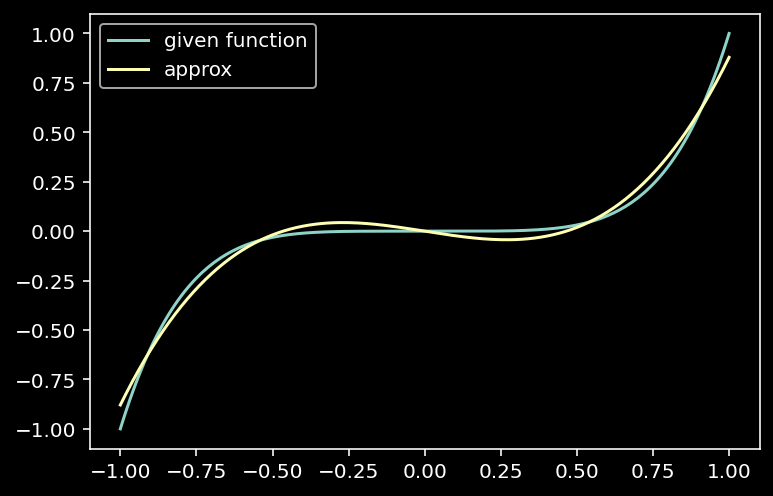

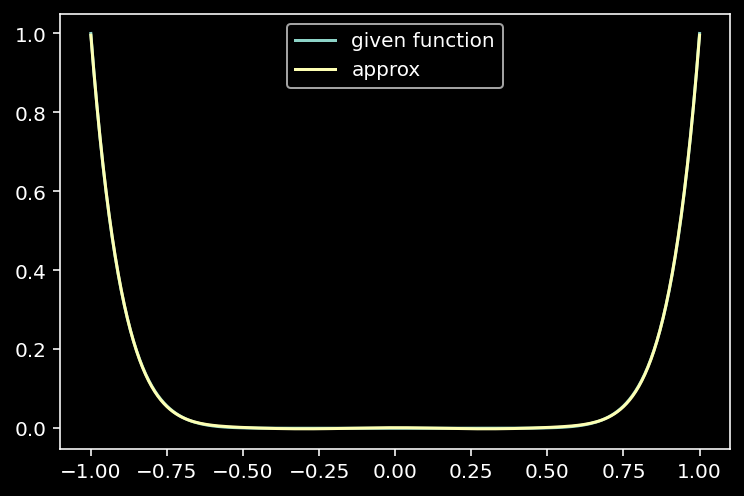

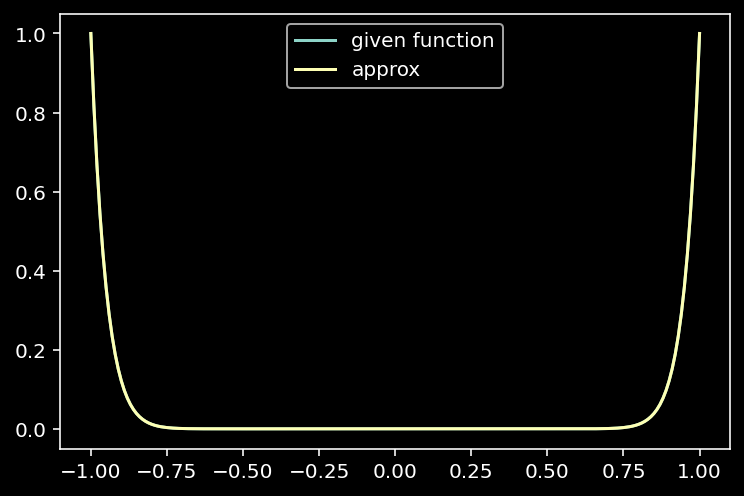

In [31]:
# function to plot real function vs  approximate
def plott(n):
    N = int(1e2)
    x = np.linspace(-1,1,2*N+1)
    plt.plot(x,xn(x,n), label="given function")
    (a,prob) = prob_n(n)
    plt.plot(x, f(x,n,a.value), label="approx")
    plt.legend()
    plt.show()

plott(5)
plott(10)
plott(20)


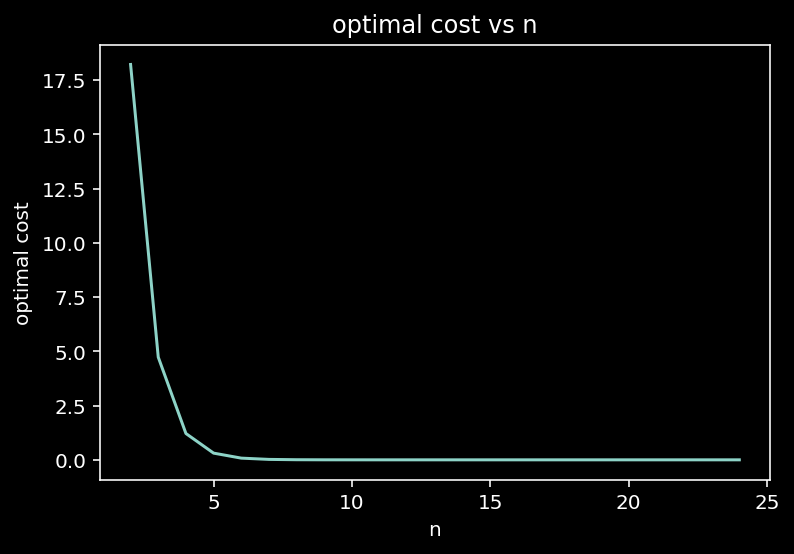

In [32]:
#plotting the optimal cost vs n
n = [i for i in range(2,25,1)]
opt = [prob_n(i) for i in n]

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(n,[i[1].value for i in opt])
ax.set_title("optimal cost vs n")
ax.set_xlabel("n")
ax.set_ylabel("optimal cost")
plt.show()


In [33]:
def prob_n_abs(n):
    N = int(70)
    x = np.linspace(-1,1,2*N+1)
    a = cp.Variable(n)
    norm = cp.pnorm(xn(x,n)-f(x,n,a),1)
    objective = cp.Minimize(norm)
    prob = cp.Problem(objective)
    prob.solve()
    return (a,prob)

(a,prob)= prob_n(20)
a.value


array([ 3.75648588e-06, -2.48311997e-09, -5.49809336e-04,  1.00978819e-07,
        1.26673103e-02, -1.04564473e-06, -1.02743657e-01,  3.09050423e-06,
        3.33692958e-01,  7.81778759e-06, -1.48477006e-01, -7.10915182e-05,
       -1.88454782e+00,  1.85259980e-04,  5.46431255e+00, -2.37053582e-04,
       -6.81565979e+00,  1.51834425e-04,  4.14129020e+00, -3.89164517e-05])

In [34]:
(a,prob) = prob_n_abs(5)
print("n=5\n",a.value,"\n",prob.value)
(a,prob) = prob_n_abs(10)
print("n=10\n",a.value,"\n",prob.value)
(a,prob) = prob_n_abs(20)
print("n=20\n",a.value,"\n",prob.value)


N = int(1e2)
x = np.linspace(-1,1,2*N+1)

# plt.plot(x,xn(x,20))
# plt.show()
# plt.plot(x, f(x,20,a.value))
# plt.show()

n=5
 [-2.45385009e-21 -1.89846939e-01 -4.01764001e-17  1.00938776e+00
  1.29437555e-16] 
 4.558361040073075
n=10
 [ 1.01403538e-03 -1.52755907e-17 -6.04460579e-02  6.68449335e-16
  5.62723165e-01 -4.96419090e-15 -1.78877072e+00  1.09107894e-14
  2.27795918e+00 -6.92537501e-15] 
 0.14684825259051876
n=20
 [-1.02112353e-06  6.49993618e-16  2.40497227e-04 -3.97269805e-14
 -8.47604211e-03  7.10793909e-13  1.15143382e-01 -5.77681757e-12
 -7.92204223e-01  2.54049081e-11  3.12110145e+00 -6.55700234e-11
 -7.46229641e+00  1.02218805e-10  1.10092877e+01 -9.46610031e-11
 -9.78768794e+00  4.79343697e-11  4.80489265e+00 -1.02212229e-11] 
 0.00014624020554266886


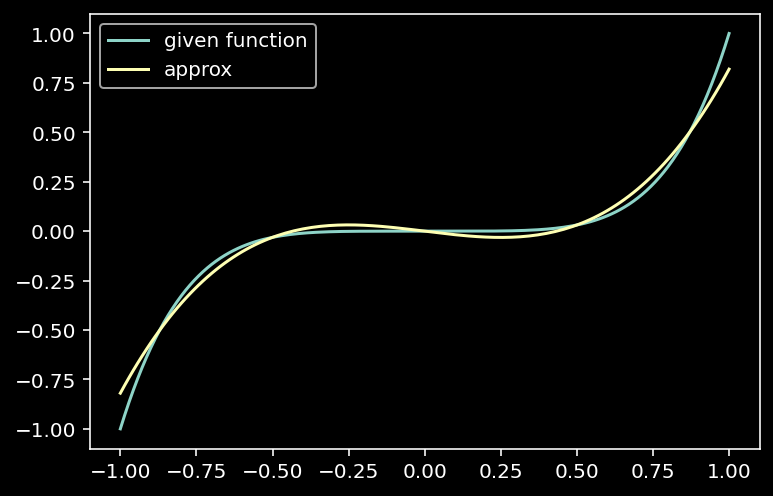

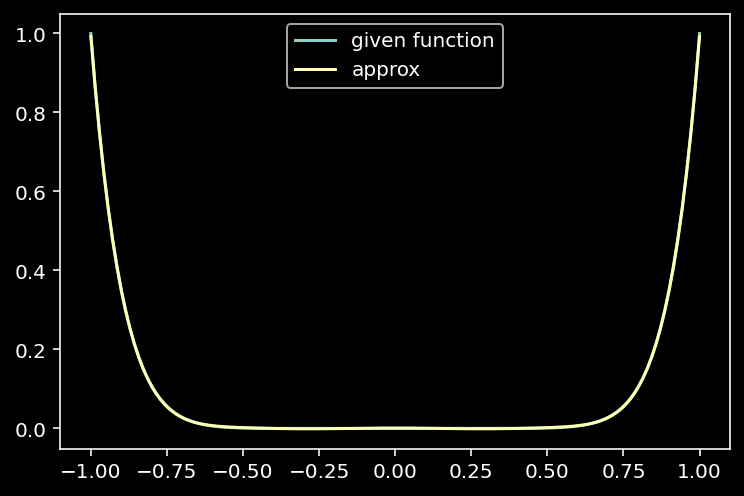

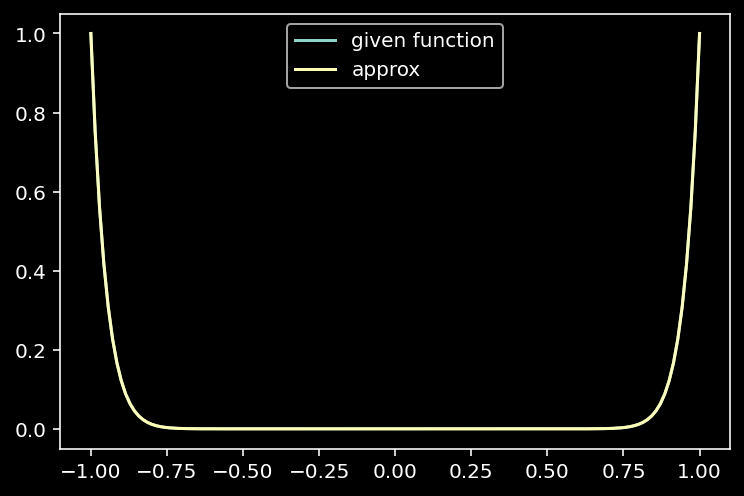

In [35]:
# plotting for part iv, for n = 5,10,20
def plottabs(n):
    N = int(70)
    x = np.linspace(-1,1,2*N+1)
    plt.plot(x,xn(x,n), label="given function")
    (a,prob) = prob_n_abs(n)
    plt.plot(x, f(x,n,a.value), label="approx")
    plt.legend()
    plt.show()

plottabs(5)
plottabs(10)
plottabs(20)

/home/cmaspi/.local/lib/python3.8/site-packages/cvxpy/problems/problem.py:1296: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


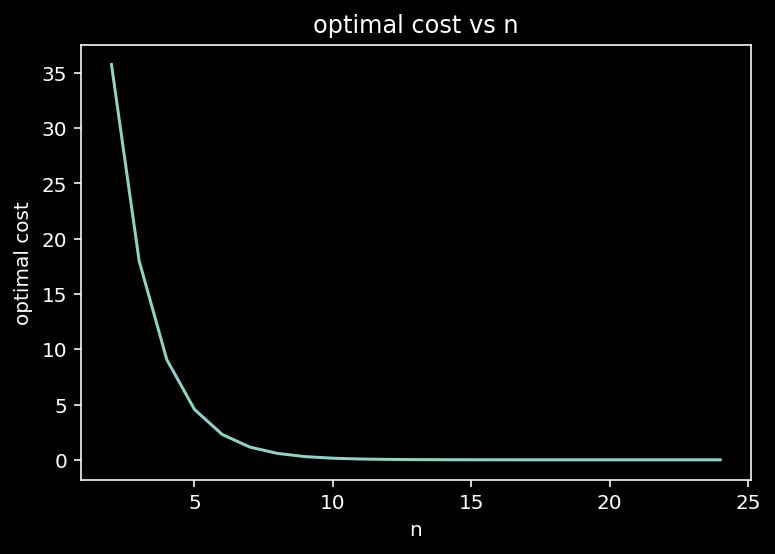

In [36]:
# plotting the cost vs n function
n = [i for i in range(2,25)]
opt = [prob_n_abs(i) for i in n]

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(n,[i[1].value for i in opt])
ax.set_title("optimal cost vs n")
ax.set_xlabel("n")
ax.set_ylabel("optimal cost")
plt.show()